In [72]:
# import necessary packages for geospatial analysis and data processing
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import mapclassify as mc

print("Packages imported successfully!")

Packages imported successfully!


# CMP Map

In [73]:
map_data = gpd.read_file('./Maine_water.geojson')
map_data = GeoDataFrame(map_data)

map_data.set_crs(epsg=4326, inplace=True)
map_data

,OBJECTID,IWWH_ID,RATING,GlobalID,SHAPE_Length,SHAPE_Area,geometry
0,180272,Iwwh200001,M,{4868E118-1F61-4B6B-A0C8-BF876BB76BD7},0.075900,0.000112,"MULTIPOLYGON (((-70.77298 43.55439, -70.77342 ..."
1,180273,Iwwh200002,M,{3DE0EB1C-853E-416F-AE16-014B8C709A16},0.023109,0.000027,"MULTIPOLYGON (((-70.76641 43.51547, -70.76635 ..."
2,180274,Iwwh011219,H,{ABE52784-4D17-4526-8C8F-95C7D3BB1B57},0.078227,0.000174,"MULTIPOLYGON (((-70.72905 43.50895, -70.72883 ..."
3,180275,Iwwh200007,M,{5887B324-DD23-4918-B250-B3FA1F34F682},0.012398,0.000011,"MULTIPOLYGON (((-70.77351 43.50068, -70.77326 ..."
4,180276,Iwwh200009,M,{9438E475-2C28-4D1E-A7BA-9ED78A54137D},0.026924,0.000035,"MULTIPOLYGON (((-70.78624 43.50594, -70.78621 ..."
...,...,...,...,...,...,...,...
6394,186666,Iwwh304304,M,{B31E8DE4-21E9-46C8-B591-BBC19C4E3F3C},0.030773,0.000031,"MULTIPOLYGON (((-69.04671 45.90312, -69.04703 ..."
6395,186667,Iwwh304306,M,{39225257-A53D-4F2D-BBA4-04EF57424623},0.110854,0.000205,"MULTIPOLYGON (((-69.04204 45.87366, -69.04237 ..."
6396,186668,Iwwh304312,M,{7DE2B957-BEA6-48C5-A534-1BFAEFECC07B},0.036772,0.000043,"MULTIPOLYGON (((-69.01814 45.88491, -69.01864 ..."
6397,186669,Iwwh304313,M,{5DC551D6-7D9F-4E3E-850D-A9194AC1B870},0.024790,0.000026,"MULTIPOLYGON (((-69.01024 45.88722, -69.01050 ..."


In [74]:
distance = pd.read_csv("./outages_with_waterbody_distances_CMP.csv")
distance = distance.dropna()
distance = distance.drop_duplicates()
distance 

,Unnamed: 0,OPCO,CustomerCount,CircuitVoltage,Division,CauseDesc,faultlatitude,faultlongitude,geometry,nearest_waterbody_idx,nearest_waterbody_distance_km
0,23,CMP,12,12470.0,Lewiston,Cause Unknown/Undetermined,43.881638,-70.299745,POINT (-70.299745 43.881638),178,2.770799
1,25,CMP,4,12470.0,Augusta,Animal Squirrel Contact,44.096295,-69.781802,POINT (-69.781802 44.096295),5700,2.440012
2,27,CMP,86,12470.0,Alfred,Defective Line Cutout,43.424700,-70.777591,POINT (-70.777591 43.4247),799,2.120574
3,29,CMP,40,12470.0,Dover,Tree on Conductor Tree In ROW,44.863163,-69.271300,POINT (-69.2713 44.863163),540,2.923080
4,31,CMP,9,12470.0,Brunswick,Animal Squirrel Contact,43.802775,-70.190537,POINT (-70.190537 43.802775),195,8.284261
...,...,...,...,...,...,...,...,...,...,...,...
65998,177030,CMP,6,12470.0,Brunswick,Cause Unknown/Undetermined,44.112008,-69.522550,POINT (-69.52255 44.112008),719,1.396288
65999,177031,CMP,43,12470.0,Alfred,Animal Squirrel Contact,43.329063,-70.767730,POINT (-70.76773 43.329063),74,5.312111
66000,177032,CMP,3,12470.0,Augusta,Cause Unknown/Undetermined,44.298532,-69.951912,POINT (-69.951912 44.298532),495,2.902441
66001,177033,CMP,9,12470.0,Alfred,Animal Squirrel Contact,43.281539,-70.787968,POINT (-70.787968 43.281539),74,1.111904


In [75]:
osprey_nests = pd.read_excel('Osprey Data, Confirmed Nests as of 8.2.2023.xlsx', sheet_name='Outages, 2018-Current')
osprey_nests = osprey_nests[['CauseDesc', 'Division', 'OPCO','faultlatitude','faultlongitude']]
osprey_nests = osprey_nests.dropna()
osprey_nests = osprey_nests.drop_duplicates()
osprey_nests = osprey_nests.loc[osprey_nests["OPCO"] == "CMP"]
osprey_nests

,CauseDesc,Division,OPCO,faultlatitude,faultlongitude
91,Animal Bird Contact,Bridgton,CMP,44.040734,-70.871123
101,Animal Bird Contact,Alfred,CMP,43.237298,-70.595564
102,Animal Bird Contact,Rockland,CMP,44.415600,-68.703035
103,Foreign Object,Brunswick,CMP,44.032384,-69.530649
123,Animal Bird Contact,Brunswick,CMP,43.921269,-69.895193
...,...,...,...,...,...
10525,Foreign Object,Rockland,CMP,44.302239,-68.981878
10527,Animal Bird Contact,Alfred,CMP,43.405840,-70.780704
10541,Animal Bird Contact,Dover,CMP,44.808103,-69.109161
10570,Animal Bird Contact,Rockland,CMP,44.462399,-68.784810


In [76]:
new = osprey_nests.merge(distance, on = ['CauseDesc', 'Division', 'OPCO','faultlatitude','faultlongitude'], how = 'left')
osprey_nests = new.dropna()
osprey_nests

,CauseDesc,Division,OPCO,faultlatitude,faultlongitude,Unnamed: 0,CustomerCount,CircuitVoltage,geometry,nearest_waterbody_idx,nearest_waterbody_distance_km
0,Animal Bird Contact,Bridgton,CMP,44.040734,-70.871123,22440.0,2.0,12470.0,POINT (-70.871123 44.040734),244.0,2.948397
1,Animal Bird Contact,Alfred,CMP,43.237298,-70.595564,7459.0,29.0,12470.0,POINT (-70.595564 43.237298),58.0,3.596975
2,Animal Bird Contact,Rockland,CMP,44.415600,-68.703035,7353.0,103.0,34500.0,POINT (-68.703035 44.4156),6090.0,1.261402
3,Foreign Object,Brunswick,CMP,44.032384,-69.530649,7374.0,2466.0,12470.0,POINT (-69.530649 44.032384),291.0,1.599546
4,Animal Bird Contact,Brunswick,CMP,43.921269,-69.895193,13882.0,52.0,34500.0,POINT (-69.895193 43.921269),951.0,1.470611
...,...,...,...,...,...,...,...,...,...,...,...
3947,Foreign Object,Rockland,CMP,44.302239,-68.981878,61682.0,1493.0,34500.0,POINT (-68.981878 44.302239),1201.0,3.522459
3948,Animal Bird Contact,Alfred,CMP,43.405840,-70.780704,48810.0,1.0,12470.0,POINT (-70.780704 43.40584),337.0,1.472594
3949,Animal Bird Contact,Dover,CMP,44.808103,-69.109161,60740.0,15.0,12470.0,POINT (-69.109161 44.808103),294.0,1.978636
3950,Animal Bird Contact,Rockland,CMP,44.462399,-68.784810,58740.0,3.0,34500.0,POINT (-68.78481 44.462399),761.0,3.508219


In [77]:
osprey_nests["nearest_waterbody_distance_km"].describe()

count    96.000000
mean      2.551195
std       1.443219
min       0.216501
25%       1.846724
50%       2.272189
75%       3.346436
max      10.710981
Name: nearest_waterbody_distance_km, dtype: float64

Text(0.5, 0, 'Distance to Water (km)')

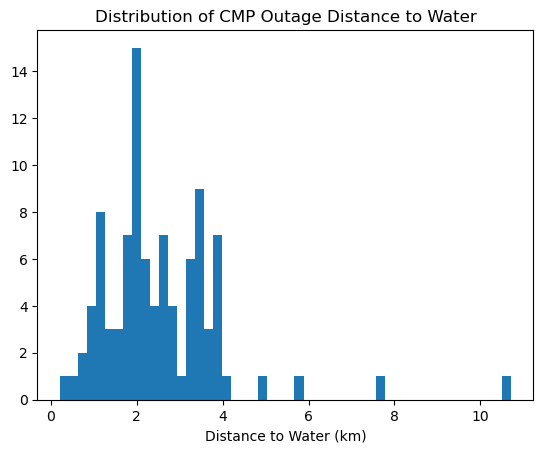

In [78]:
plt.hist(osprey_nests["nearest_waterbody_distance_km"], bins = 50)
plt.title("Distribution of CMP Outage Distance to Water")
plt.xlabel("Distance to Water (km)")

In [79]:
# Convert pandas DataFrame to GeoDataFrame
osprey_nests = gpd.GeoDataFrame(osprey_nests, geometry=gpd.points_from_xy(osprey_nests.faultlongitude, osprey_nests.faultlatitude))

In [80]:
geometry = [Point(xy) for xy in zip(osprey_nests.faultlongitude, osprey_nests.faultlatitude)]
crs = {'init': 'epsg:4326'}
osprey_nests_gdf = GeoDataFrame(osprey_nests, crs=crs, geometry=geometry)

/Users/ZhongxuanChen/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [81]:
osprey_nests_gdf

,CauseDesc,Division,OPCO,faultlatitude,faultlongitude,Unnamed: 0,CustomerCount,CircuitVoltage,geometry,nearest_waterbody_idx,nearest_waterbody_distance_km
0,Animal Bird Contact,Bridgton,CMP,44.040734,-70.871123,22440.0,2.0,12470.0,POINT (-70.87112 44.04073),244.0,2.948397
1,Animal Bird Contact,Alfred,CMP,43.237298,-70.595564,7459.0,29.0,12470.0,POINT (-70.59556 43.23730),58.0,3.596975
2,Animal Bird Contact,Rockland,CMP,44.415600,-68.703035,7353.0,103.0,34500.0,POINT (-68.70303 44.41560),6090.0,1.261402
3,Foreign Object,Brunswick,CMP,44.032384,-69.530649,7374.0,2466.0,12470.0,POINT (-69.53065 44.03238),291.0,1.599546
4,Animal Bird Contact,Brunswick,CMP,43.921269,-69.895193,13882.0,52.0,34500.0,POINT (-69.89519 43.92127),951.0,1.470611
...,...,...,...,...,...,...,...,...,...,...,...
3947,Foreign Object,Rockland,CMP,44.302239,-68.981878,61682.0,1493.0,34500.0,POINT (-68.98188 44.30224),1201.0,3.522459
3948,Animal Bird Contact,Alfred,CMP,43.405840,-70.780704,48810.0,1.0,12470.0,POINT (-70.78070 43.40584),337.0,1.472594
3949,Animal Bird Contact,Dover,CMP,44.808103,-69.109161,60740.0,15.0,12470.0,POINT (-69.10916 44.80810),294.0,1.978636
3950,Animal Bird Contact,Rockland,CMP,44.462399,-68.784810,58740.0,3.0,34500.0,POINT (-68.78481 44.46240),761.0,3.508219


<Axes: >

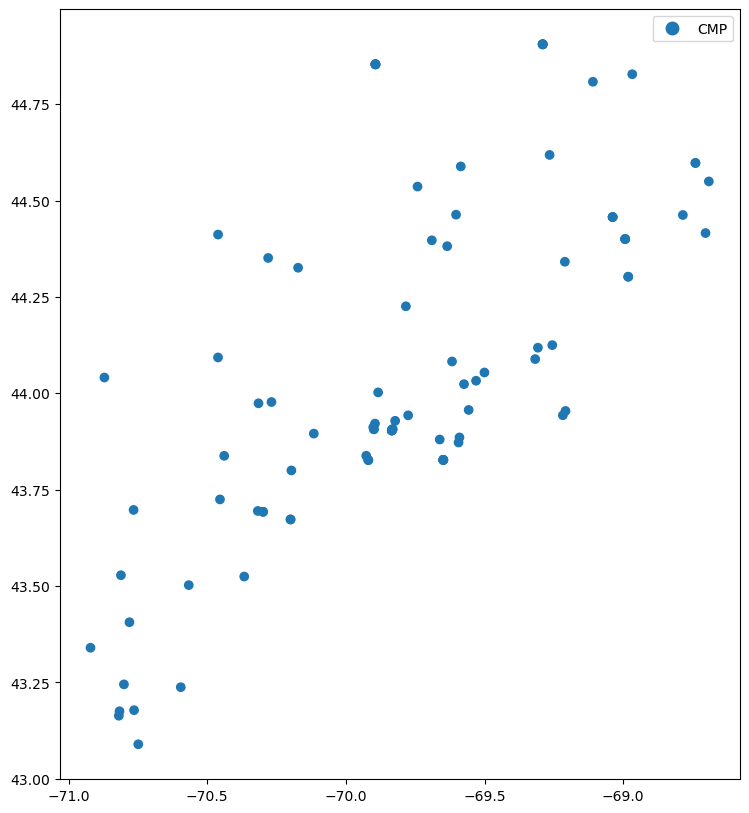

In [82]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
osprey_nests_gdf.plot(column='OPCO', k=5, legend=True, ax=ax)

<Axes: >

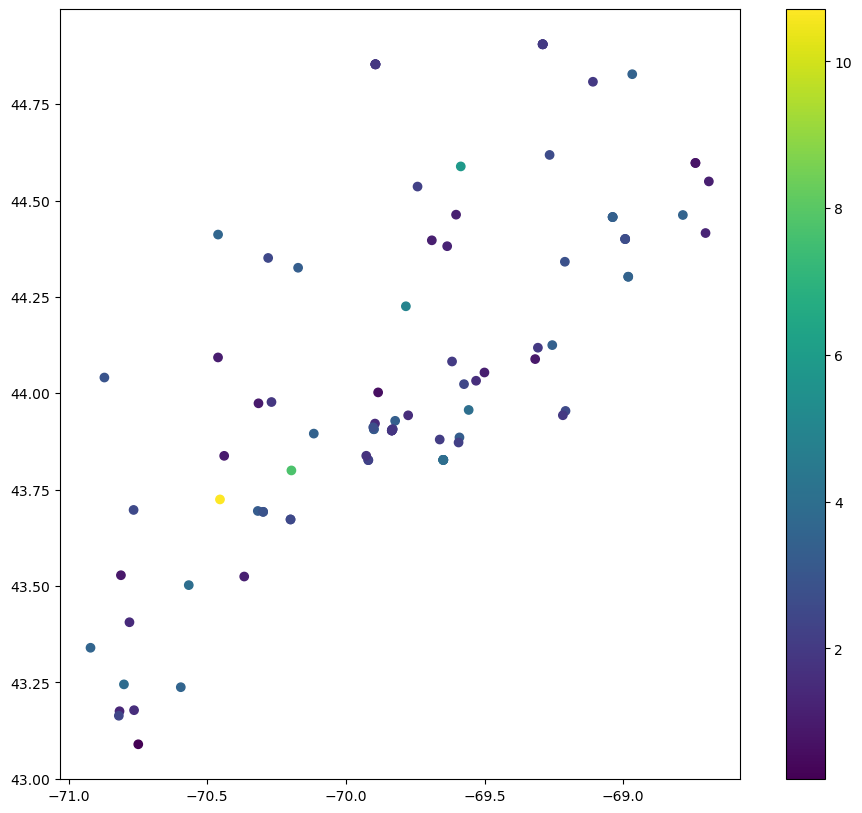

In [83]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
osprey_nests_gdf.plot(column='nearest_waterbody_distance_km', k=5, legend=True, ax=ax)

# Spatial Autocorrelation Analysis

In [84]:
df = osprey_nests_gdf
df = df.drop_duplicates(subset = ["geometry", "nearest_waterbody_distance_km"])
df

,CauseDesc,Division,OPCO,faultlatitude,faultlongitude,Unnamed: 0,CustomerCount,CircuitVoltage,geometry,nearest_waterbody_idx,nearest_waterbody_distance_km
0,Animal Bird Contact,Bridgton,CMP,44.040734,-70.871123,22440.0,2.0,12470.0,POINT (-70.87112 44.04073),244.0,2.948397
1,Animal Bird Contact,Alfred,CMP,43.237298,-70.595564,7459.0,29.0,12470.0,POINT (-70.59556 43.23730),58.0,3.596975
2,Animal Bird Contact,Rockland,CMP,44.415600,-68.703035,7353.0,103.0,34500.0,POINT (-68.70303 44.41560),6090.0,1.261402
3,Foreign Object,Brunswick,CMP,44.032384,-69.530649,7374.0,2466.0,12470.0,POINT (-69.53065 44.03238),291.0,1.599546
4,Animal Bird Contact,Brunswick,CMP,43.921269,-69.895193,13882.0,52.0,34500.0,POINT (-69.89519 43.92127),951.0,1.470611
...,...,...,...,...,...,...,...,...,...,...,...
3946,Foreign Object,Rockland,CMP,44.302239,-68.981878,61627.0,1506.0,34500.0,POINT (-68.98188 44.30224),1201.0,3.522459
3948,Animal Bird Contact,Alfred,CMP,43.405840,-70.780704,48810.0,1.0,12470.0,POINT (-70.78070 43.40584),337.0,1.472594
3949,Animal Bird Contact,Dover,CMP,44.808103,-69.109161,60740.0,15.0,12470.0,POINT (-69.10916 44.80810),294.0,1.978636
3950,Animal Bird Contact,Rockland,CMP,44.462399,-68.784810,58740.0,3.0,34500.0,POINT (-68.78481 44.46240),761.0,3.508219


In [85]:
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'

/var/folders/24/6ckwcq6s11dcd62_z_1k97_h0000gp/T/ipykernel_25571/1595884902.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq =  lps.weights.Queen.from_dataframe(df)


In [86]:
y = df['nearest_waterbody_distance_km']
ylag = lps.weights.lag_spatial(wq, y)

In [87]:
ylagq5 = mc.Quantiles(ylag, k=5)

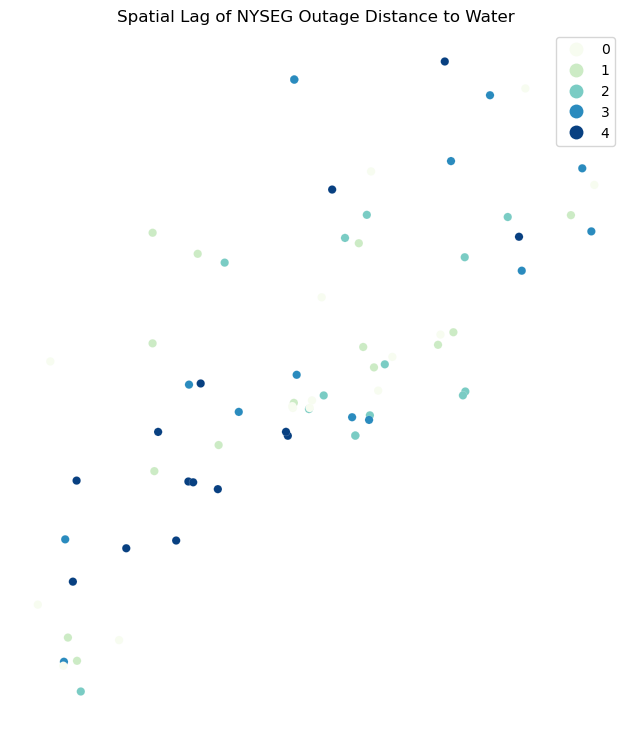

In [88]:
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag of NYSEG Outage Distance to Water")

plt.show()

/Users/ZhongxuanChen/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


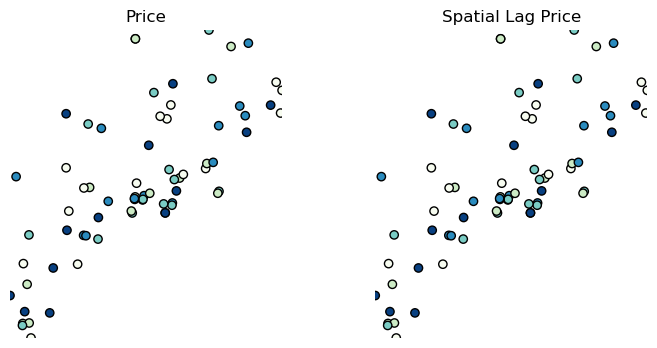

In [89]:
df['lag_median_pri'] = ylag
f,ax = plt.subplots(1,2,figsize=(2.16*4,4))
df.plot(column='nearest_waterbody_distance_km', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=5, cmap='GnBu')
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Price")
df.plot(column='nearest_waterbody_distance_km', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=5)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial Lag Price")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

# Global Autocorrelation

In [90]:
wq.transform = 'r'
y = df['nearest_waterbody_distance_km']

In [91]:
np.random.seed(12345)
mi = esda.Moran(y, wq)
mi.I

-0.08463496376624215

/var/folders/24/6ckwcq6s11dcd62_z_1k97_h0000gp/T/ipykernel_25571/2386594959.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(mi.sim, shade=True)
/Users/ZhongxuanChen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ZhongxuanChen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, "Moran's I")

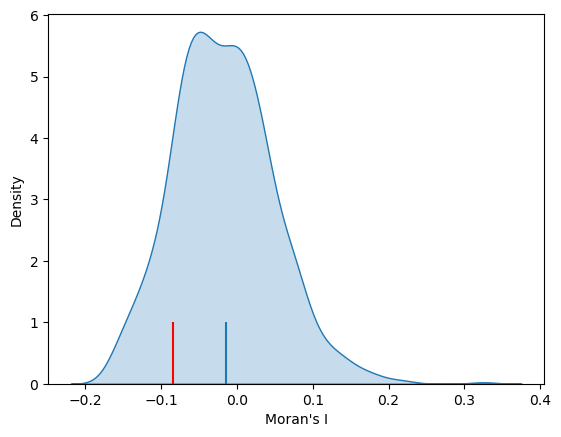

In [92]:
import seaborn as sbn
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r')
plt.vlines(mi.EI, 0,1)
plt.xlabel("Moran's I")

In [93]:
mi.p_sim

0.14

# Local Autocorrelation: Hot Spots, Cold Spots, and Spatial Outliers¶

In [94]:
wq.transform = 'r'
lag_price = lps.weights.lag_spatial(wq, df['nearest_waterbody_distance_km'])

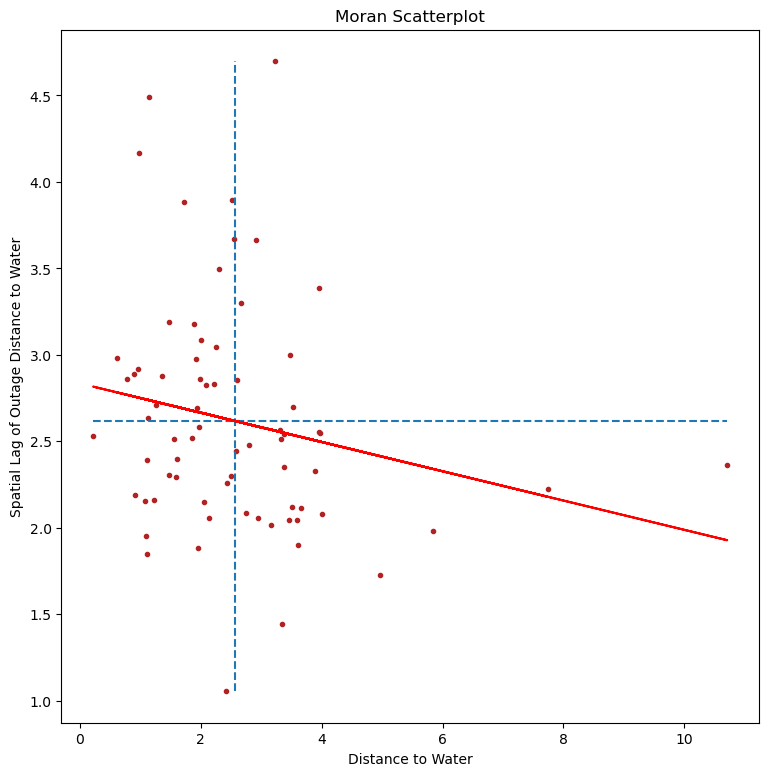

In [95]:
price = df['nearest_waterbody_distance_km']
b, a = np.polyfit(price, lag_price, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(price, lag_price, '.', color='firebrick')

 # dashed vert at mean of the price
plt.vlines(price.mean(), lag_price.min(), lag_price.max(), linestyle='--')
 # dashed horizontal at mean of lagged price
plt.hlines(lag_price.mean(), price.min(), price.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(price, a + b*price, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Outage Distance to Water')
plt.xlabel('Distance to Water')
plt.show()

In [96]:
li = esda.moran.Moran_Local(y, wq)

In [97]:
li_q = li.q

In [98]:
np.unique(li_q)

array([1, 2, 3, 4])

In [99]:
li.p_sim.min()

0.006

In [100]:
(li.p_sim < 0.001).sum()

0

In [101]:
sig = 1 * (li.p_sim < 0.05)
hotspot = 1 * (sig * li.q==1)
coldspot = 3 * (sig * li.q==3)
doughnut = 2 * (sig * li.q==2)
diamond = 4 * (sig * li.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [102]:
spots = hotspot + coldspot + doughnut + diamond
spots
spot_labels = ['0 NS', '1 I', '2 II', '3 III', '4 IV']
labels = [spot_labels[i] for i in spots]

/Users/ZhongxuanChen/opt/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:314: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  collection = ax.scatter(x, y, vmin=vmin, vmax=vmax, cmap=cmap, **kwargs)


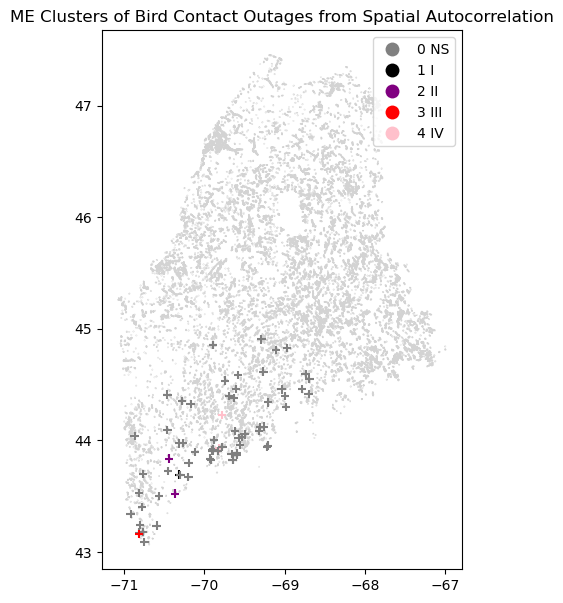

In [116]:
from matplotlib import colors
base = map_data.plot(color='white', edgecolor='lightgrey', figsize=(10,7))
hmap = colors.ListedColormap(['grey', 'black', 'purple', 'red', 'pink'])

# f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(marker = "+", column='cl', categorical=True, \
        k=2, cmap=hmap, ax=base, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("ME Clusters of Bird Contact Outages from Spatial Autocorrelation")
plt.show()

In [114]:
df["labels"] = labels
df_hotspot = df[df["labels"] == "1 I"]
print(len(df_hotspot))
df_doughnut = df[df["labels"] == "2 II"]
print(len(df_doughnut))
df_coldspot= df[df["labels"] == "3 III"]
print(len(df_coldspot))
df_diamond = df[df["labels"] == "4 IV"]
print(len(df_diamond))
df_ns= df[df["labels"] == "0 NS"]
print(len(df_ns))

1
2
1
2
65


/Users/ZhongxuanChen/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
